# Part I - Loan Dataset Exploration
## by (Olusegun Emmanuel Ajibola ) olusegunajibola.e@gmail.com

## Introduction

This document explores a dataset containing outcomes and attributes for approximately 18,000 loan application. Our objective is to understand and summarise the different behaviours or attributes 
between customers who paid back their loan and customers who did not using the historical data available.

> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline

import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

import pandas as pd

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format # suppress scientific notation for all floats

import matplotlib.pyplot as plt

import seaborn as sb
# Choose the first tuple of RGB colors
base_color = sb.color_palette()[0]

%matplotlib inline

import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# change directory
os.chdir('/content/drive/MyDrive/Colab Files/Udacity/Udacity - Data Analyst/projects/03_Flights_n_Loans/lloyds-bigdata-loan-customers')
!ls

Mounted at /content/drive
'01 guides_n_instructions'  'A Data Strategy'   loan_data_cleaned_v2.0.csv
'02 data_n_dictionary'	     LICENSE	        README.md


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
# load data dictionary
loan_data_dict = pd.read_excel('02 data_n_dictionary/LBG Step Up Data Dictionary.xlsx', skiprows = 16, header = None, names = [None,'Field Number', 'Field Name',  'Data Type', None, 'Description (optional)'])
loan_data_dict = loan_data_dict[['Field Number', 'Field Name',  'Data Type', 'Description (optional)']]
loan_data_dict

,Field Number,Field Name,Data Type,Description (optional)
0,1,id,Unique Identifer,A unique ID for the loan listing.
1,2,addr_state,Categoric Variable,The US state provided by the borrower in the loan application (address)
2,3,annual_inc,Numeric Variable,The annual income provided by the borrower during registration.
3,4,emp_length,Categoric Variable,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. Data captured as categorical.
4,5,emp_title,Categoric Variable,The job title supplied by the Borrower when applying for the loan.
5,6,home_ownership,Categoric Variable,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER"
6,7,installment,Numeric Variable,The monthly payment owed by the borrower if the loan originates.
7,8,loan_amnt,Numeric Variable,The listed amount of the loan applied for by the borrower.
8,9,purpose,Categoric Variable,A category provided by the borrower for the loan request.
9,10,term,Categoric Variable,The number of payments on the loan. Values are in months and can be either 36 or 60.


In [4]:
# load in the dataset into a pandas dataframe, print statistics

loan_data = pd.read_excel('02 data_n_dictionary/LBG Step Up Data Set.xlsx')
loan = loan_data.copy()

In [5]:
# The dataset may have lots of extra spaces in cell so lets remove them using strip() function
for cols in list(loan.columns):
    if loan[cols].dtype == object: # consider only string datatypes and not floats or ints
        loan[cols] = loan[cols].str.strip()

In [6]:
# high-level overview of data shape and composition
print(loan.shape)
print(loan.dtypes)

(18324, 31)
id                          int64
addr_state                 object
annual_inc                float64
emp_length                 object
emp_title                  object
home_ownership             object
installment               float64
loan_amnt                   int64
purpose                    object
term                       object
int_rate                  float64
avg_cur_bal               float64
inq_last_12m              float64
max_bal_bc                float64
mo_sin_old_il_acct        float64
mo_sin_old_rev_tl_op      float64
mo_sin_rcnt_rev_tl_op     float64
mo_sin_rcnt_tl            float64
mort_acc                  float64
mths_since_last_delinq    float64
num_bc_tl                 float64
num_il_tl                 float64
num_op_rev_tl             float64
num_tl_90g_dpd_24m        float64
num_tl_op_past_12m        float64
open_acc                    int64
percent_bc_gt_75          float64
pub_rec_bankruptcies        int64
total_acc                   int64
to

In [7]:
loan.sample(2)

,id,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,int_rate,avg_cur_bal,inq_last_12m,max_bal_bc,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
16328,106226693,CA,66000.0,10+ years,Inside Sales,MORTGAGE,476.33,20000,moving,60 months,0.1505,23938.0,6.0,5159.0,141.0,90.0,7.0,7.0,4.0,34.0,6.0,10.0,6.0,0.0,3.0,10,16.7,0,20,84964.0,Fully Paid
61,85602152,CA,38000.0,2 years,Benefits Specialist,RENT,327.34,10000,debt_consolidation,36 months,0.1099,1581.0,3.0,2333.0,120.0,167.0,14.0,14.0,0.0,10.0,2.0,4.0,5.0,1.0,0.0,7,50.0,0,12,7906.0,Fully Paid


### Missing Values

In [8]:
loan.isna().sum() # shows sum of missing values per variable

id                           0
addr_state                   0
annual_inc                   0
emp_length                1174
emp_title                 1285
home_ownership               0
installment                  0
loan_amnt                    0
purpose                      0
term                         0
int_rate                     0
avg_cur_bal                566
inq_last_12m              8929
max_bal_bc                8929
mo_sin_old_il_acct        1132
mo_sin_old_rev_tl_op       564
mo_sin_rcnt_rev_tl_op      564
mo_sin_rcnt_tl             564
mort_acc                   398
mths_since_last_delinq    9048
num_bc_tl                  564
num_il_tl                  564
num_op_rev_tl              564
num_tl_90g_dpd_24m         564
num_tl_op_past_12m         564
open_acc                     0
percent_bc_gt_75           610
pub_rec_bankruptcies         0
total_acc                    0
total_bal_ex_mort          398
loan_status                  0
dtype: int64

In [9]:
8929/18324 * 100, 9048/18324 * 100, 1282/18324 * 100

(48.72844357127265, 49.377865094957436, 6.996289019864658)

From the above, the missing values for the variables `inq_last_12m`, and `max_bal_bc` account for approximately 50% of the dataset, as a result, we can drop these columns. In addition, we do this because we judge that these columns/variables will not have much power in our data strategy. We equally drop `id` since it is a unique identifier and does not add any information.

In [10]:
loan = loan.drop(columns = ['max_bal_bc', 'inq_last_12m', 'id'], axis = 0)

Nevertheless, the column `mths_since_last_delinq` tells us _The number of months since the borrower's last delinquency (missed payment)_. As a result, we fill the missing values here with 0. We do this because we judge that there may be additional information which shows creditworthiness.

In [11]:
loan['mths_since_last_delinq'] = loan['mths_since_last_delinq'].fillna(0)

In [12]:
loan[loan.mths_since_last_delinq== 0].shape # 0 months of missed payment

(9061, 28)

Originally in the dataset, there are only 13 occurences where an applicant has zero (0) months of missed payments.

For other variables with missing data, we judge that the proportion of missing data is quite small so we can drop them entirely.

In [13]:
loan = loan.dropna()

In [14]:
print('After data cleaning, we are left with {:.2f}% of our original data.'.format(loan.shape[0]/loan_data.shape[0]* 100))

After data cleaning, we are left with 86.57% of our original data.


The absence of missing values will help us come to more valid conclusion(s) in our data strategy.

### Making Categories

In [15]:
# convert emp_length, and term into ordered categorical types
ordinal_var_dict = {'emp_length': ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'],
                    'term': ['36 months', '60 months']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

# convert emp_title, addr_state, home_ownership, purpose, and loan_status into categorical types

category_list = ['addr_state', 'home_ownership', 'purpose', 'loan_status']

for var in category_list:
    loan[var] = loan[var].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


### Other cleaning tasks

1. converting `emp_title` records to lower cases.

In [16]:
loan['emp_title'] = loan['emp_title'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


2. Group/generalize occupations 
    - a.  e.g Worship Pastor, Pastor, Sr. Pastor, Assistant Pastor, Senior Pastor should all refer to 'pastor'.


In [17]:
loan.query('emp_title == "pastor"') # a first example

,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,int_rate,avg_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
208,WI,50850.0,1 year,pastor,RENT,750.86,24000,credit_card,36 months,0.0789,11193.0,137.0,291.0,11.0,11.0,1.0,0.0,4.0,9.0,7.0,0.0,1.0,13,100.0,0,19,145512.0,Fully Paid
660,CA,50000.0,10+ years,pastor,RENT,670.90,20000,credit_card,36 months,0.1269,5972.0,109.0,200.0,8.0,8.0,3.0,66.0,10.0,2.0,8.0,0.0,3.0,9,42.9,0,23,47779.0,Fully Paid
1510,PA,58750.0,10+ years,pastor,MORTGAGE,645.25,20000,debt_consolidation,36 months,0.0999,8997.0,79.0,252.0,24.0,19.0,1.0,0.0,6.0,7.0,5.0,0.0,0.0,13,100.0,0,17,69232.0,Fully Paid
2809,NC,49000.0,10+ years,pastor,MORTGAGE,311.23,12000,debt_consolidation,60 months,0.1899,10319.0,150.0,132.0,32.0,31.0,0.0,0.0,9.0,9.0,8.0,0.0,0.0,11,60.0,0,21,103187.0,Fully Paid
2919,SD,40000.0,4 years,pastor,RENT,361.38,12000,credit_card,36 months,0.0532,4996.0,155.0,207.0,10.0,10.0,0.0,61.0,3.0,6.0,4.0,0.0,1.0,6,0.0,0,13,29978.0,Fully Paid
6001,NJ,30000.0,3 years,pastor,OWN,260.85,12000,credit_card,60 months,0.1099,4900.0,49.0,232.0,4.0,4.0,0.0,0.0,9.0,3.0,6.0,0.0,1.0,7,20.0,0,14,29401.0,Fully Paid
6766,GA,48000.0,< 1 year,pastor,MORTGAGE,646.76,20000,debt_consolidation,36 months,0.1015,10199.0,138.0,115.0,20.0,12.0,1.0,0.0,10.0,18.0,4.0,0.0,1.0,16,66.7,0,33,84278.0,Fully Paid
7925,SC,46268.0,10+ years,pastor,RENT,260.97,8000,debt_consolidation,36 months,0.1075,3295.0,184.0,141.0,9.0,7.0,0.0,0.0,3.0,5.0,3.0,0.0,3.0,5,0.0,0,10,16475.0,Fully Paid
12495,GA,143000.0,10+ years,pastor,OWN,1224.01,39600,debt_consolidation,36 months,0.0707,43859.0,120.0,368.0,13.0,13.0,4.0,0.0,5.0,9.0,4.0,0.0,0.0,12,100.0,0,21,178477.0,Fully Paid


In [18]:
loan[loan.emp_title.str.contains('pastor')].emp_title # view the problem

208                  pastor
660                  pastor
1510                 pastor
2809                 pastor
2919                 pastor
3930          senior pastor
5023         worship pastor
5871          senior pastor
6001                 pastor
6378            lead pastor
6766                 pastor
7925                 pastor
8531             sr. pastor
9116       assistant pastor
9272          senior pastor
10630         senior pastor
11889         senior pastor
12495                pastor
12902       chaplain/pastor
13857      executive pastor
14253         senior pastor
15671          youth pastor
15886    pastoral associate
Name: emp_title, dtype: object

In [19]:
loan = loan.replace({'emp_title': r'.*pastor.*'}, {'emp_title': 'pastor'}, regex=True) # correct the problem

In [20]:
loan[loan.emp_title.str.contains('pastor')].emp_title # confirm the solution

208      pastor
660      pastor
1510     pastor
2809     pastor
2919     pastor
3930     pastor
5023     pastor
5871     pastor
6001     pastor
6378     pastor
6766     pastor
7925     pastor
8531     pastor
9116     pastor
9272     pastor
10630    pastor
11889    pastor
12495    pastor
12902    pastor
13857    pastor
14253    pastor
15671    pastor
15886    pastor
Name: emp_title, dtype: object

b. nurse

In [21]:
# this dictionary does the task as done previously for the 'pastor' case.

# we match each job in the original dataset (the dictionary key) and assign it a new value/generalization (dictionary value)

emp_title_dict = {'hr':'human resources' , 'human resource' : 'human resources', 'vp' : 'top executive','owner' : 'top executive','founder' : 'top executive', 'president' : 'top executive', 'ceo' : 'top executive', 'data' : 'ICT expert', 'software' : 'ICT expert','programmer': 'ICT expert', 'computer': 'ICT expert','telecom': 'ICT expert', 'nurse': 'nurse', 'police':  'police officer', 'accountant' : 'accouting', 'accountant' : 'accountant','teacher':'school staff',
                  'secretary': 'secretary', 'prison': 'prison staff', 'correction': 'prison staff', 'supervisor' : 'supervisor', 'bank':'banker', 'school':'school staff', 'lawrence':'school staff','contractor':'contractor', 
                  'manager' : 'manager', 'manger' : 'manager','director' : 'director', 'care': 'care practitioner/giver', 'doctoral': 'PhD',
                  'cyber' : 'cyber_expert', 'air force' : 'military officer', 'navy':'military officer', 'naval':'military officer', 'academy': 'academician', 'academic': 'academician',
                  'army' : 'military officer', 'soldier' : 'military officer', 'mechanic' : 'mechanic', 'engineer' : 'engineer', 'consult' : 'consultant',
                  'military' : 'military officer', 'admin' : 'admin officer/administrator', 'teller': 'teller', 'cler' : 'clerk', 'post' : 'postal officer', 'traffic' : 'traffic officer',
                  'artist': 'artist', 'products' : 'others', 'law' : 'law & legal', 'techno': 'technology', 'techni' : 'technician', 'dispatch' : 'dispatch', 'compliance' : 'compliance', 
                  'communication' : 'communication', 'contract' : 'contract staff', 'contratc' : 'contract staff', 'educat' : 'educator', 'graphic' : 'graphic designer', 'fire' : 'fire fighter/expert',
                  'equip' : 'equipment manager', 'insur' : 'insurance', 'farm' : 'farmer', 'dental' : 'dental', 'medical' : 'medical', 'advisor' : 'advisor', 'drive' : 'driver', 'analyst' : 'analyst', 'directot' : 'director', 'paramedic' : 'paramedical',
                  'sales' : 'sales rep', 'food' : 'food services', 'nutrition' : 'nutritionist', 'diet' : 'diet expert/dietitian', 'supevisor' : 'supervisor', 'claim' : 'claims expert', 'writer' : 'writer', 'chiropractic': 'doctor', 'rn in er' : 'nurse',
                  'architect' : 'architect', 'photo' : 'media personnel', 'video' : 'media personnel', 'customer' : 'customer service', 'assistant' : 'assistant', 'agent' : 'agent', 'analysis' : 'analyst',
                  'couns' : 'counselor', 'judge' : 'judge', 'operator' : 'operator', 'healt' : 'health expert', 'mgr' : 'manager', 'veterin' : 'veterinarian'
                  }

In [22]:
len(set(list(emp_title_dict.values()))) # unique values in the dictionary

65

In [23]:
# emp_title_dict.items()

In [24]:
for i in emp_title_dict.keys():
    # a for loop that matches each dictionary key to its new value using regex
    if i == 'event':
        loan = loan.replace({'emp_title': r'^' + i}, {'emp_title': emp_title_dict[i]}, regex=True) 
    elif i == 'hr':
        loan = loan.replace({'emp_title': r'^' + i}, {'emp_title': emp_title_dict[i]}, regex=True) 
    elif i == 'prevention':
        loan = loan.replace({'emp_title': r''+i }, {'emp_title': emp_title_dict[i]}, regex=True)
    else:
        loan = loan.replace({'emp_title': r'.*' + i + '.*'}, {'emp_title': emp_title_dict[i]}, regex=True)     

In [25]:
# convert emp_title variable into categorical types

loan['emp_title'] = loan['emp_title'].astype('category')

loan['mort_acc'] = loan['mort_acc'].astype(int)

In [26]:
print('Original data had {} unique job titles but the updated/cleaned data has {}.' .format(loan_data.emp_title.nunique(), loan.emp_title.nunique() ) )

Original data had 10040 unique job titles but the updated/cleaned data has 3636.


Subsequently in our analysis, this generalization of job roles will help us to identify which job roles are more likely to pay back loans or not.

In [27]:
# loan.emp_title.unique()

In [28]:
loan.to_csv('loan_data_cleaned_v2.0.csv')

In [29]:
loan.emp_title.value_counts()[:25] # top 25 job roles in the dataset

manager                        2362
top executive                   770
director                        622
school staff                    503
supervisor                      427
driver                          385
sales rep                       384
engineer                        374
analyst                         345
nurse                           332
technician                      328
admin officer/administrator     315
assistant                       261
ICT expert                      241
operator                        175
consultant                      173
rn                              130
clerk                           128
customer service                117
mechanic                        114
accountant                      109
police officer                  107
human resources                  98
medical                          94
banker                           88
Name: emp_title, dtype: int64

### Clean Data Overview

In [30]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15863 entries, 1 to 18323
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   addr_state              15863 non-null  category
 1   annual_inc              15863 non-null  float64 
 2   emp_length              15863 non-null  category
 3   emp_title               15863 non-null  category
 4   home_ownership          15863 non-null  category
 5   installment             15863 non-null  float64 
 6   loan_amnt               15863 non-null  int64   
 7   purpose                 15863 non-null  category
 8   term                    15863 non-null  category
 9   int_rate                15863 non-null  float64 
 10  avg_cur_bal             15863 non-null  float64 
 11  mo_sin_old_il_acct      15863 non-null  float64 
 12  mo_sin_old_rev_tl_op    15863 non-null  float64 
 13  mo_sin_rcnt_rev_tl_op   15863 non-null  float64 
 14  mo_sin_rcnt_tl        

In [31]:
# high-level overview of data shape and composition
print(loan.shape)
print(loan.dtypes)

(15863, 28)
addr_state                category
annual_inc                 float64
emp_length                category
emp_title                 category
home_ownership            category
installment                float64
loan_amnt                    int64
purpose                   category
term                      category
int_rate                   float64
avg_cur_bal                float64
mo_sin_old_il_acct         float64
mo_sin_old_rev_tl_op       float64
mo_sin_rcnt_rev_tl_op      float64
mo_sin_rcnt_tl             float64
mort_acc                     int64
mths_since_last_delinq     float64
num_bc_tl                  float64
num_il_tl                  float64
num_op_rev_tl              float64
num_tl_90g_dpd_24m         float64
num_tl_op_past_12m         float64
open_acc                     int64
percent_bc_gt_75           float64
pub_rec_bankruptcies         int64
total_acc                    int64
total_bal_ex_mort          float64
loan_status               category
dtype: o

In [32]:
loan.sample(5) # random 5 samples of the data

,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,int_rate,avg_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
15079,IL,120000.0,2 years,analyst,RENT,494.86,15000,debt_consolidation,36 months,0.1153,2800.0,22.0,79.0,12.0,12.0,0,60.0,7.0,1.0,6.0,0.0,1.0,7,20.0,0,10,19600.0,Fully Paid
6844,CA,150000.0,5 years,director,RENT,1086.96,35000,debt_consolidation,36 months,0.0739,39365.0,104.0,300.0,4.0,4.0,8,0.0,7.0,1.0,10.0,0.0,1.0,14,0.0,0,25,47186.0,Charged Off
12989,TX,65000.0,10+ years,driver,MORTGAGE,99.69,2700,other,36 months,0.1952,47438.0,146.0,20.0,16.0,6.0,7,51.0,2.0,8.0,2.0,0.0,3.0,7,100.0,0,17,67443.0,Fully Paid
6252,VA,92000.0,10+ years,smithfield packing co.,MORTGAGE,524.62,23000,debt_consolidation,60 months,0.1311,14022.0,220.0,282.0,9.0,7.0,4,0.0,22.0,18.0,16.0,0.0,4.0,26,33.3,0,56,115747.0,Fully Paid
4011,IL,114000.0,10+ years,actuary,MORTGAGE,722.76,24000,credit_card,36 months,0.0532,16469.0,156.0,276.0,22.0,5.0,5,0.0,13.0,8.0,12.0,0.0,1.0,16,33.3,0,33,80174.0,Fully Paid


In [33]:
# descriptive statistics for all variables
loan.describe(include = 'all')

,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,int_rate,avg_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status
count,15863,1.586300e+04,15863,15863,15863,15863.000000,15863.000000,15863,15863,15863.000000,15863.000000,15863.000000,15863.000000,15863.000000,15863.000000,15863.000000,15863.000000,15863.000000,15863.000000,15863.000000,15863.000000,15863.000000,15863.000000,15863.000000,15863.000000,15863.000000,1.586300e+04,15863
unique,51,NaN,11,3636,4,NaN,NaN,13,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,CA,NaN,10+ years,manager,MORTGAGE,NaN,NaN,debt_consolidation,36 months,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fully Paid
freq,2269,NaN,5825,2362,7847,NaN,NaN,9379,11152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12516
mean,NaN,8.339125e+04,NaN,NaN,NaN,480.925961,16015.383282,NaN,NaN,0.138621,13755.589863,125.476896,177.872218,12.905566,7.551724,1.647355,17.857341,8.062157,8.955746,8.378365,0.089201,2.312488,11.975667,45.752378,0.141083,25.324340,5.430611e+04,NaN
std,NaN,6.714038e+04,NaN,NaN,NaN,279.751742,9403.993436,NaN,NaN,0.048418,16319.828897,52.766843,91.419546,16.035188,8.354608,2.003642,23.396591,4.815566,7.367101,4.630755,0.453261,1.946193,5.600317,35.811216,0.388027,12.131364,5.057483e+04,NaN
min,NaN,7.000000e+03,NaN,NaN,NaN,30.650000,1000.000000,NaN,NaN,0.053100,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,0.000000e+00,NaN
25%,NaN,5.000000e+04,NaN,NaN,NaN,268.700000,8400.000000,NaN,NaN,0.104900,3347.500000,97.000000,116.000000,4.000000,3.000000,0.000000,0.000000,5.000000,4.000000,5.000000,0.000000,1.000000,8.000000,12.500000,0.000000,17.000000,2.391300e+04,NaN
50%,NaN,6.947200e+04,NaN,NaN,NaN,413.440000,14550.000000,NaN,NaN,0.133500,7584.000000,129.000000,162.000000,8.000000,5.000000,1.000000,4.000000,7.000000,7.000000,7.000000,0.000000,2.000000,11.000000,44.400000,0.000000,23.000000,4.128500e+04,NaN
75%,NaN,9.947500e+04,NaN,NaN,NaN,652.410000,22000.000000,NaN,NaN,0.169900,18830.500000,153.000000,226.000000,16.000000,10.000000,3.000000,32.000000,10.000000,12.000000,11.000000,0.000000,3.000000,15.000000,75.000000,0.000000,32.000000,6.819800e+04,NaN


### Structure of the dataset?

There are 18,324 records  and 31 variables in the original  loan application data. After wrangling and  cleaning, we were left with a total of 15,863 records and 28 variables. Our response variable is the `loan_status`, which determines whether an applicant was able to pay off their loans `Fully Paid` or unable to `Charged-Off`. The data consists of 7 categorical variables and 21 variables that are numerical (int and float).

Furthermore, we ordered the `emp_length` and `term` variables according to the following levels.

[low/minimum] -----> [high/maximum]

'emp_length': < 1 year, 1 year, 2 years, 3 years, 4 years, 5 years, 6 years, 7 years, 8 years, 9 years, 10+ years.

'term': 36 months, 60 months.

### What is the main feature of interest in the dataset?

Given that we want to determine the difference between two groups of customers, we use the `loan_status` variable when completing our analysis.

### What features in the dataset do we think will help support our investigation into our feature of interest?

I expect that the loan amount `loan_amnt` , annual income `annual_inc`, customer state address `addr_state`, interest rate `int_rate `, the number of months since the borrower's last delinquency (missed payment) `mths_since_last_delinq`, and employment length in years `emp_length` have a reasonable impact on a customer's ability to pay back their loans. However, our analysis will help us to discover whether or not this assumption is true. In addition, we shall look at other variables and see how they affect the outcome of a customer paying back their loan.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


_It is important to note that whenever we refer to 'the data' or 'dataset', we are refering to the cleaned data._

I'll start by looking at the distribution of the main variable of interest: `loan_status`.

**Question 1**: What is the distribution of the `loan_status` variable.

In [34]:
# loan_data.loan_status.value_counts()

In [35]:
loan.loan_status.value_counts()

Fully Paid     12516
Charged Off     3347
Name: loan_status, dtype: int64

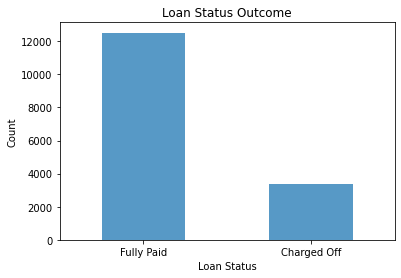

In [36]:
loan.loan_status.value_counts().plot(kind = 'bar', alpha=.75, rot=0 )
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Loan Status Outcome');

**Observation**

In [37]:
print( 'In the dataset, {:.2f}% of the loans were paid back.' .format(loan.loan_status.value_counts()[0]/loan.loan_status.value_counts().sum() * 100))

In the dataset, 78.90% of the loans were paid back.




>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

**Question 2**:
What is the distribution of customer's address state? Where do our customers mostly come from?

In [38]:
loan.addr_state.value_counts()

CA    2269
TX    1342
NY    1285
FL    1133
IL     613
NJ     554
PA     542
GA     517
OH     490
VA     429
NC     427
AZ     399
MI     397
MA     354
MD     354
CO     348
WA     345
MO     288
MN     271
TN     269
IN     268
NV     247
AL     219
CT     212
LA     208
WI     203
SC     197
OR     181
KY     155
OK     150
KS     117
UT     115
AR      96
NM      96
MS      96
HI      80
NH      68
RI      59
DE      57
NE      56
WV      54
MT      48
VT      43
DC      35
SD      34
ME      34
WY      32
ND      31
AK      29
ID      16
IA       1
Name: addr_state, dtype: int64

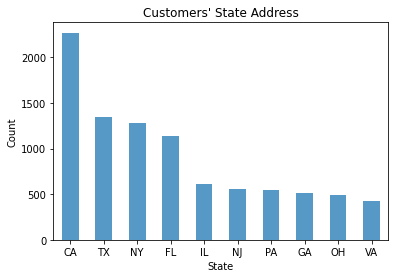

In [39]:
loan.addr_state.value_counts()[:10].plot(kind = 'bar', alpha=.75, rot=0 )
plt.xlabel('State')
plt.ylabel('Count')
plt.title("Customers' State Address");

In [40]:
print("Most of our customers are from California (CA) and they comprise of {:.2f}% of the data." .format(loan.addr_state.value_counts()[0]/loan.addr_state.value_counts().sum() * 100))

Most of our customers are from California (CA) and they comprise of 14.30% of the data.


**Question 3**: What is the distribution of customer's annual income?

In [41]:
# https://en.wikipedia.org/wiki/Histogram: Scott's normal reference rule to choose bin sizes based on the standard deviation of the data.

h = 3.49 * loan['annual_inc'].std() * loan.shape[0]**(1/3)
scott = (loan['annual_inc'].max() - loan['annual_inc'].min()) * 0.5

k = scott/250 # divided by 250 to aid better visualization


# other approaches to bin size that did not work out well with the data

# k =  loan.shape[0]**(1/2)

# k = 2 * loan.shape[0]**(1/3)

k

5218.0

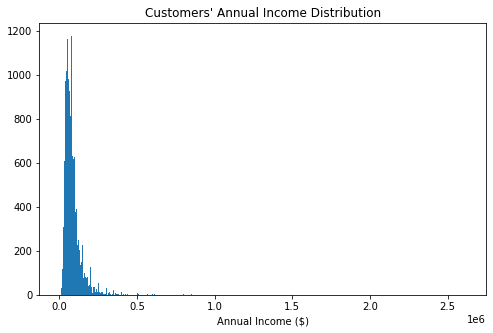

In [42]:
# start with a standard-scaled plot
binsize = k
bins = np.arange(loan['annual_inc'].min()-binsize, loan['annual_inc'].max()+binsize, binsize)
# bins = np.arange(loan['annual_inc'].min()-500, loan['annual_inc'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'annual_inc', bins = bins)

plt.xlabel('Annual Income ($)')
plt.title("Customers' Annual Income Distribution")
plt.show()

There's a long tail in the distribution, it is skewed to the right. As a result, we proceed with putting it on a log scale instead.

In [43]:
np.log10(loan['annual_inc'].min())

3.845098040014257

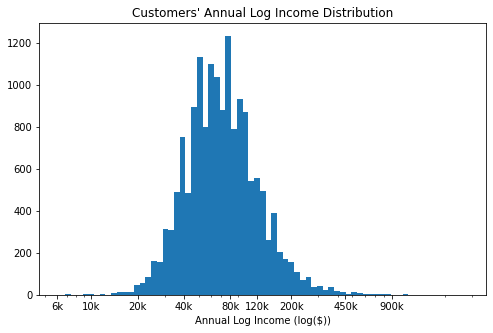

In [44]:
# log-scaled plot
log_binsize = np.log10(k)*10**(-2)
bins = 10 ** np.arange(np.log10(loan['annual_inc'].min())-0.05, np.log10(loan['annual_inc'].max()) + log_binsize, log_binsize)


plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'annual_inc', bins = bins)

plt.xscale('log')
plt.xticks([6e3, 1e4, 2e4, 4e4, 8e4, 12e4, 20e4,  45e4, 90e4], ['6k', '10k', '20k', '40k', '80k', '120k',  '200k', '450k', '900k'])
plt.xlabel('Annual Log Income (log($))')
plt.title("Customers' Annual Log Income Distribution")
plt.show()

From the above two plots, we see that the income is a long-tailed distribution. When plotted on a log-scale, the price distribution looks roughly unimodal, with the peak at \$80k. From the two histograms, we can see that income is heavily skewed and consists of so many outliers.

**Question 4**:
What is the distribution of customer's employment length in years?

In [45]:
loan.emp_length.value_counts()

10+ years    5825
2 years      1507
< 1 year     1292
3 years      1284
1 year       1103
5 years      1017
4 years       972
6 years       763
8 years       748
7 years       742
9 years       610
Name: emp_length, dtype: int64

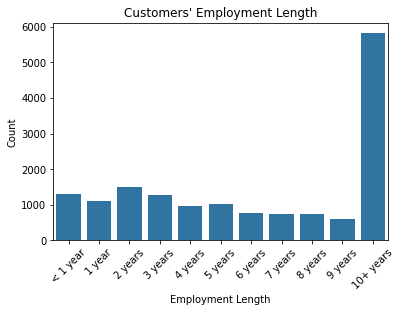

In [46]:
sb.countplot(data=loan, x='emp_length',  order = ordinal_var_dict['emp_length'], color=base_color)
plt.xticks(rotation=45)
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title("Customers' Employment Length");

In [47]:
print("Most of our customers had 10+ years of length on their current job. These set of customers comprised of {:.2f}% of the data." .format(loan.emp_length.value_counts()[0]/loan.emp_length.value_counts().sum() * 100))

Most of our customers had 10+ years of length on their current job. These set of customers comprised of 36.72% of the data.


**Question 5**:
What is the distribution of customer's employment title? What are the top 15 employment titles of the customers.

In [48]:
loan.emp_title.value_counts()[:15]

manager                        2362
top executive                   770
director                        622
school staff                    503
supervisor                      427
driver                          385
sales rep                       384
engineer                        374
analyst                         345
nurse                           332
technician                      328
admin officer/administrator     315
assistant                       261
ICT expert                      241
operator                        175
Name: emp_title, dtype: int64

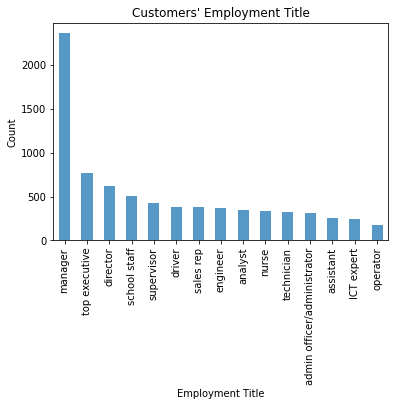

In [49]:
loan.emp_title.value_counts()[:15].plot(kind = 'bar', alpha=.75, rot=90 )

# sb.countplot(data=loan, x='emp_title',  color=base_color)
# plt.xticks(rotation=15)
plt.xlabel('Employment Title')
plt.ylabel('Count')
plt.title("Customers' Employment Title");

In [50]:
print("Most of our customers had 'manager' in their current job title. These set of customers comprised of {:.2f}% of the data." .format(loan.emp_title.value_counts()[0]/loan.emp_title.value_counts().sum() * 100))

Most of our customers had 'manager' in their current job title. These set of customers comprised of 14.89% of the data.


**Question 6**:
What is the distribution of customer's home ownership status?

In [51]:
loan.home_ownership.value_counts().sum()

15863

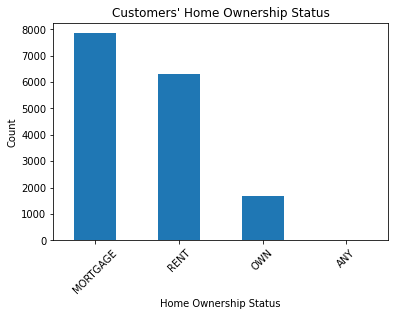

In [52]:
loan.home_ownership.value_counts()[:15].plot(kind = 'bar',  rot=45 )

# sb.countplot(data=loan, x='emp_title',  color=base_color)
# plt.xticks(rotation=15)
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
plt.title("Customers' Home Ownership Status");

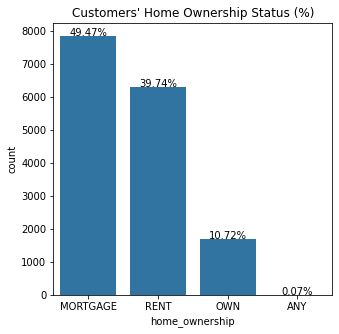

In [53]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 5,5

# Returns the sum of all not-null values in `home_ownership` column
n_mort = loan['home_ownership'].value_counts().sum()

# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=loan, x='home_ownership', color=base_color, order = loan['home_ownership'].value_counts().index);


# Recalculating the type_counts just to have clarity.
type_counts = loan['home_ownership'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks()
# locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_mort)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.title("Customers' Home Ownership Status (%)");

In [54]:
print("Most of our customers had 'mortgage' as their home status. These set of customers comprised of {:.2f}% of the data." .format(loan.home_ownership.value_counts()[0]/loan.home_ownership.value_counts().sum() * 100))

Most of our customers had 'mortgage' as their home status. These set of customers comprised of 49.47% of the data.


**Question 7**: What is the distribution of customer's monthly installment?

In [55]:
# https://en.wikipedia.org/wiki/Histogram: Approaches to choose bin sizes  of a data.

k = 2 * loan.shape[0]**(1/3)

# # other approaches to bin size that did not work out well with the data

# h = 3.49 * loan['installment'].std() * loan.shape[0]**(1/3)
# scott = (loan['installment'].max() - loan['installment'].min()) * 0.5

# # k = scott # divided by 250 to aid better visualization

# # k =  loan.shape[0]**(1/2)

k

50.25258849895244

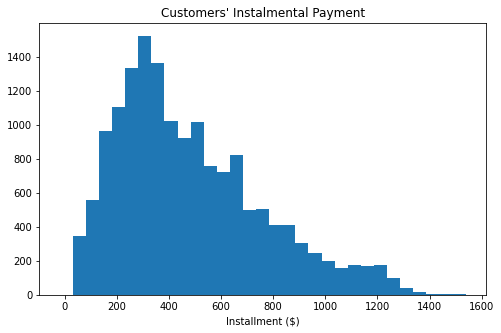

In [56]:
# start with a standard-scaled plot
binsize = k
bins = np.arange(loan['installment'].min()-binsize, loan['installment'].max()+binsize, binsize)


plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'installment', bins = bins)

plt.xlabel('Installment ($)')
plt.title("Customers' Instalmental Payment")
plt.show()

There's a long tail in the distribution, it is skewed to the right. As a result, we proceed with putting it on a log scale instead.

In [57]:
np.log10(loan['installment'].min())

1.4864304788544338

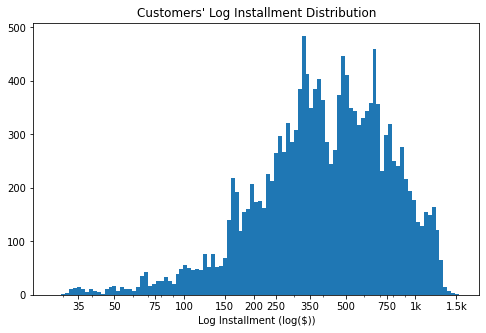

In [58]:
# log-scaled plot
log_binsize = np.log10(k)*10**(-2)
bins = 10 ** np.arange(np.log10(loan['installment'].min()) - 0.05, np.log10(loan['installment'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'installment', bins = bins)

plt.xscale('log')
plt.xticks([ 35, 50, 75, 1e2, 1.5e2, 2e2, 2.5e2, 3.5e2, 5e2, 7.5e2, 10e2, 15e2], ['35', '50', '75', '100', '150', '200', '250', '350', '500',  '750',  '1k',  '1.5k'])
plt.xlabel('Log Installment (log($))')
plt.title("Customers' Log Installment Distribution")
plt.show()

From the above two plots, we see that the income is a long-tailed distribution. When plotted on a log-scale, the installmental payment distribution looks roughly trimodal, with one peak between \$275 and \$350, a second peak a little between \$375 and \$500, and the third peak between \$600 and \$700.

**Question 8**: What is the distribution of customer's loan amount?

In [59]:
# https://en.wikipedia.org/wiki/Histogram: Approaches to choose bin sizes  of a data.

# k = 2 * loan.shape[0]**(1/3)

# # other approaches to bin size that did not work out well with the data

h = 3.49 * loan['installment'].std() * loan.shape[0]**(1/3)
scott = (loan['installment'].max() - loan['installment'].min()) * 0.5

k = scott *2.25 # multiply by 2.25 to aid better visualization 

# k =  loan.shape[0]**(1/2)

k

1657.395

In [60]:
loan['loan_amnt'].min(), loan['loan_amnt'].max()

(1000, 40000)

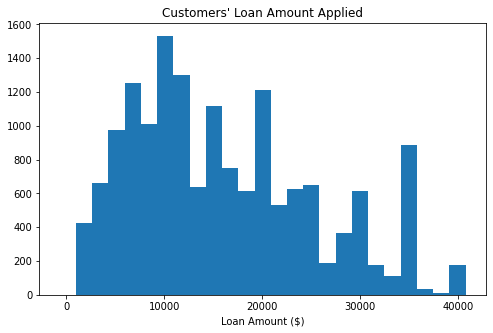

In [61]:
# start with a standard-scaled plot
binsize = k
bins = np.arange(loan['loan_amnt'].min()-binsize, loan['loan_amnt'].max()+binsize, binsize)


plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'loan_amnt', bins = bins)

plt.xlabel('Loan Amount ($)')
plt.title("Customers' Loan Amount Applied")
plt.show()

The least loan amount applied for was \$1,000 and the maximum is \$40,000. From the histogram, which doesn't point at a particular form of distribution tells us that the loan amount applied for by customers is pretty random with several peaks.

In [62]:
np.log10(loan['loan_amnt'].min())

3.0

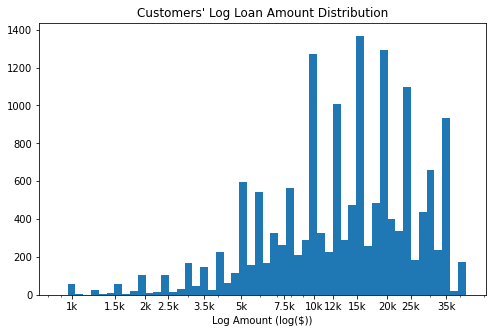

In [63]:
# log-scaled plot
log_binsize = np.log10(k)*10**(-2)
bins = 10 ** np.arange(np.log10(loan['loan_amnt'].min()) - 0.05, np.log10(loan['loan_amnt'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'loan_amnt', bins = bins)

plt.xscale('log')
plt.xticks([  1e3, 1.5e3, 2e3, 2.5e3, 3.5e3, 5e3, 7.5e3, 10e3, 12e3, 15e3, 20e3, 25e3, 35e3], 
           [ '1k', '1.5k', '2k', '2.5k', '3.5k', '5k',  '7.5k',  '10k', '12k', '15k',  '20k',  '25k',  '35k'])
plt.xlabel('Log Amount (log($))')
plt.title("Customers' Log Loan Amount Distribution")
plt.show()

After log-scaling the histogram, we notice that the distribution is left-skewed with spikes across several ranges.  Which shows that more customers are likely to take on some particular amount of loans. For example, many customers applied for loans in the amount of \$10k, \$20k, and \$30k.

**Question 9**:
What is the distribution of customer's category provided by the borrower for the loan request i.e loan purpose?

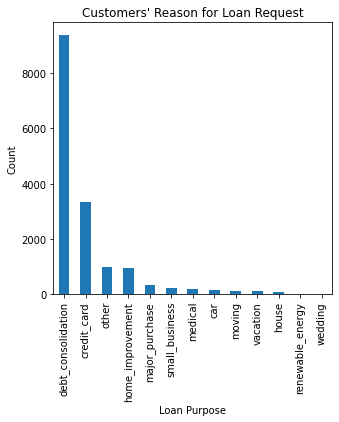

In [64]:
loan.purpose.value_counts()[:15].plot(kind = 'bar',  rot=90 )

plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.title("Customers' Reason for Loan Request");

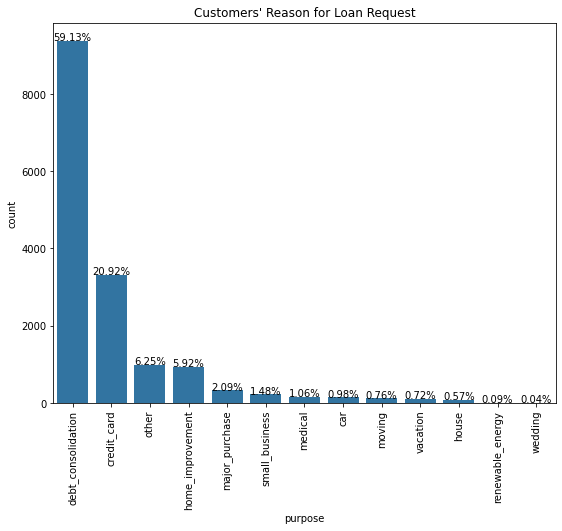

In [65]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 9,7

# Returns the sum of all not-null values in `home_ownership` column
n_purpose = loan['purpose'].value_counts().sum()

# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sb.color_palette()[0]
sb.countplot(data=loan, x='purpose', color=base_color, order = loan['purpose'].value_counts().index);


# Recalculating the type_counts just to have clarity.
type_counts = loan['purpose'].value_counts()

# get the current tick locations and labels
# locs, labels = plt.xticks()
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_purpose)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
plt.title("Customers' Reason for Loan Request");

In [66]:
print("Most of our customers requested loan for debt consolidation. These set of customers comprised of {:.2f}% of the data." .format(loan.purpose.value_counts()[0]/loan.purpose.value_counts().sum() * 100))
print("On the other hand, the least reason for loan request  is wedding i.e {:.2f}%." .format(loan.purpose.value_counts()[-1]/loan.purpose.value_counts().sum() * 100))

Most of our customers requested loan for debt consolidation. These set of customers comprised of 59.13% of the data.
On the other hand, the least reason for loan request  is wedding i.e 0.04%.


**Question 10**:
What is the distribution of the loan terms?

In [67]:
loan.term.value_counts()

36 months    11152
60 months     4711
Name: term, dtype: int64

In [68]:
loan.term.value_counts().index

CategoricalIndex(['36 months', '60 months'], categories=['36 months', '60 months'], ordered=True, dtype='category')

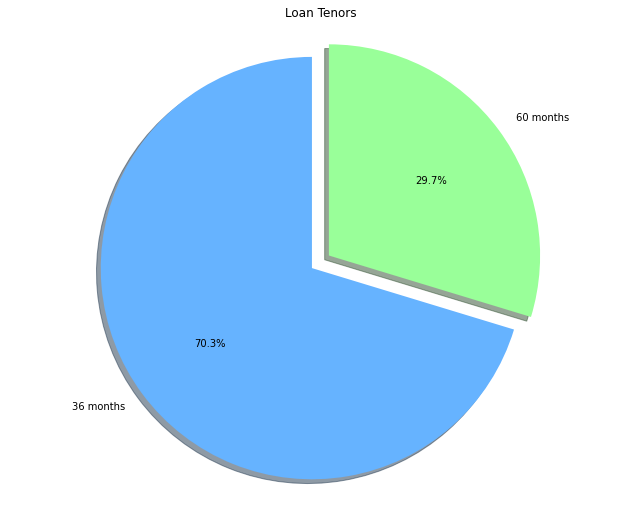

In [69]:
# only "explode" the 2nd slice (i.e. '60 months')
explode = (0, 0.1)

#add colors
colors = ['#66b3ff','#99ff99']

# pie chart
fig1, ax1 = plt.subplots()
ax1.pie(loan.term.value_counts(), explode=explode, labels=loan.term.value_counts().index, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.title("Loan Tenors");
plt.show()

The above shows that majority of the loan were for a 36-month tenor.

**Question 11**: What is the distribution of the interest rate on the loan?

In [70]:
# https://en.wikipedia.org/wiki/Histogram: Approaches to choose bin sizes  of a data.

h = 3.49 * loan['int_rate'].std() * loan.shape[0]**(1/3)
scott = (loan['int_rate'].max() - loan['int_rate'].min()) * 0.5

k = scott/20

# # other approaches to bin size that did not work out well with the data

# k = 2 * loan.shape[0]**(1/3)

#  *2.25 # multiply by 2.25 to aid better visualization 

# k =  loan.shape[0]**(1/2)

k

0.00642

In [71]:
loan['int_rate'].min(), loan['int_rate'].max()

(0.0531, 0.3099)

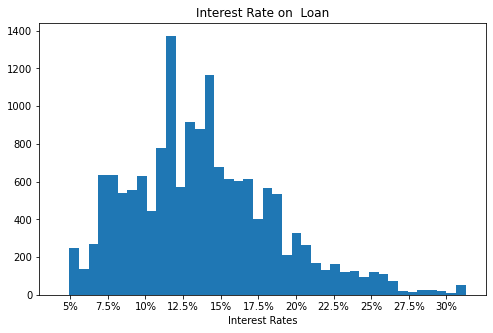

In [72]:
# start with a standard-scaled plot
binsize = k
bins = np.arange(loan['int_rate'].min()-0.01, loan['int_rate'].max()+binsize, binsize)


plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'int_rate', bins = bins)

plt.xlabel('Interest Rates')
plt.xticks([0.05, 0.075, 0.10, 0.125, 0.15, 0.175, 0.20, 0.225, 0.25, 0.275, 0.3],
           ['5%', '7.5%', '10%', '12.5%', '15%', '17.5%', '20%', '22.5%', '25%', '27.5%', '30%'])
plt.title("Interest Rate on  Loan")
plt.show()

The interest rates on loans is roughly skewed to the right (although this can be argued). The smallest rate is 5.31% and the highest rate is 30.99%. From the histogram, most customers had loans with rate in the range 11-12% and 13-14%.

**Question 12**: What is the distribution of the average current balance of all current credit lending products / accounts
?

In [73]:
# https://en.wikipedia.org/wiki/Histogram: Approaches to choose bin sizes  of a data.

h = 3.49 * loan['avg_cur_bal'].std() * loan.shape[0]**(1/3)
scott = (loan['avg_cur_bal'].max() - loan['avg_cur_bal'].min()) * 0.5

k = scott/20

# # other approaches to bin size that did not work out well with the data

# k = 2 * loan.shape[0]**(1/3)

#  *2.25 # multiply by 2.25 to aid better visualization 

# k =  loan.shape[0]**(1/2)

k

8530.9

In [74]:
loan['avg_cur_bal'].min(), loan['avg_cur_bal'].max()

(0.0, 341236.0)

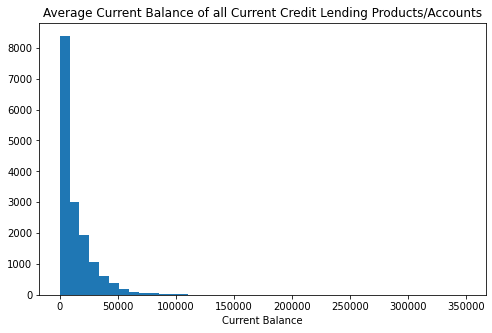

In [75]:
# start with a standard-scaled plot
binsize = k
bins = np.arange(loan['avg_cur_bal'].min()-0.01, loan['avg_cur_bal'].max()+binsize, binsize)


plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'avg_cur_bal', bins = bins)

plt.xlabel('Current Balance')
plt.title("Average Current Balance of all Current Credit Lending Products/Accounts")
plt.show()

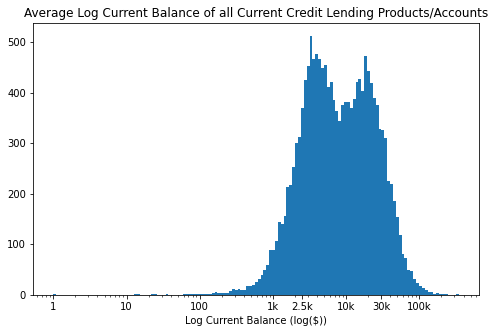

In [76]:
# log-scaled plot
log_binsize = np.log10(k)*10**(-2)
bins = 10 ** np.arange(0, np.log10(loan['avg_cur_bal'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'avg_cur_bal', bins = bins)

plt.xscale('log')
plt.xticks([  1e0, 1e1, 1e2, 1e3, 2.5e3, 1e4, 3e4, 1e5], 
           [ '1', '10', '100', '1k', '2.5k', '10k', '30k', '100k'])

plt.xlabel('Log Current Balance (log($))')
plt.title("Average Log Current Balance of all Current Credit Lending Products/Accounts")
plt.show()

After using a log-scale, the current balance has a roughly bimodal distribution. With the first peak between $2.5k and \$3k and the second between  \$20k and \$30k. We also notice the presence of outliers and this is evident because the smallest balance (without log-scaling) is \$0.0.

**Question 13**:
What is the distribution of customers according to the number of mortgage accounts that they possess?

In [77]:
loan.mort_acc.value_counts()

0     6532
1     2703
2     2294
3     1684
4     1160
5      722
6      363
7      190
8       98
9       57
10      23
11      16
12       6
14       4
13       3
27       1
29       1
18       1
19       1
17       1
20       1
16       1
15       1
Name: mort_acc, dtype: int64

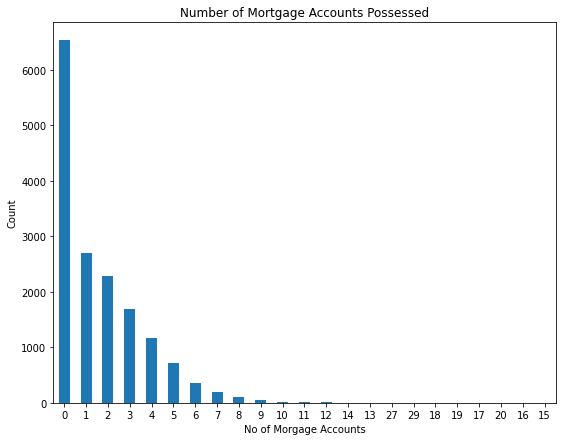

In [78]:
loan.mort_acc.value_counts().plot(kind = 'bar', rot = 0 )

plt.xlabel('No of Morgage Accounts')
plt.ylabel('Count')
plt.title("Number of Mortgage Accounts Possessed");

In [79]:
def plot_percentage_bar(col, df=loan, title = 'Title', rotation = 90):
    rcParams['figure.figsize'] = 5,5
    
    # Returns the sum of all not-null values in `home_ownership` column
    n = df[col].value_counts().sum()

    # Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
    base_color = sb.color_palette()[0]
    # sb.countplot(data=df, x=col, color=base_color, order = df[col].value_counts().index);
    df[col].value_counts().plot(kind = 'bar')


    # Recalculating the type_counts just to have clarity.
    type_counts = df[col].value_counts()

    # get the current tick locations and labels
    locs, labels = plt.xticks(rotation=rotation)

    # loop through each pair of locations and labels
    for loc, label in zip(locs, labels):

        # get the text property for the label to get the correct count
        count = type_counts[label.get_text()]
        pct_string = '{:0.2f}%'.format(100*count/n)

        # print the annotation just below the top of the bar
        plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')
    plt.title(title)

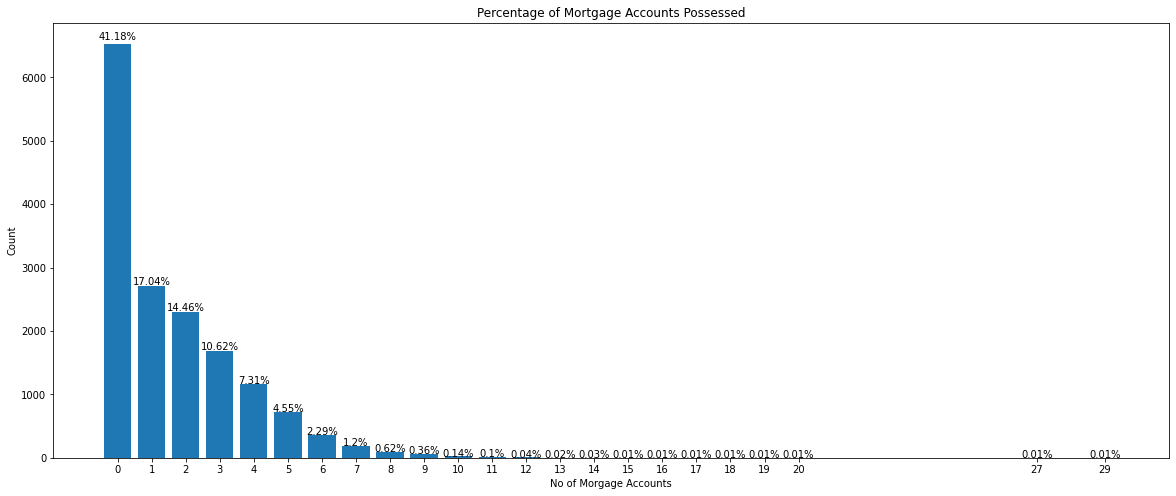

In [80]:
percentage = [round(i/sum(loan['mort_acc'].value_counts())*100, 2) for i in loan['mort_acc'].value_counts().values]

plt.figure(figsize=(20,8))

graph = plt.bar(loan['mort_acc'].value_counts().index, loan['mort_acc'].value_counts().values)

plt.xlabel('No of Morgage Accounts')
plt.ylabel('Count')
plt.title("Percentage of Mortgage Accounts Possessed");

plt.xticks(loan['mort_acc'].value_counts().index)
 
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center'
             )
    i+=1
plt.show()

From the above plot, 41.2% of the customers have no mortgage account. On the other hand, there is a group of customer who has 15, 16, 17, 18, 19, 20 and 29 mortgage accounts. This group is one individual customer have as many as those accounts.

**Question 14**:
What is/are the number of month(s) since the borrower's last delinquency (missed payment)?


In [81]:
loan.mths_since_last_delinq.value_counts()

0.0      7604
7.0       174
17.0      159
12.0      158
13.0      156
         ... 
84.0        1
96.0        1
105.0       1
97.0        1
104.0       1
Name: mths_since_last_delinq, Length: 97, dtype: int64

In [82]:
# https://en.wikipedia.org/wiki/Histogram: Approaches to choose bin sizes  of a data.

h = 3.49 * loan['mths_since_last_delinq'].std() * loan.shape[0]**(1/3)
scott = (loan['mths_since_last_delinq'].max() - loan['mths_since_last_delinq'].min()) * 0.5

k = scott/2.5

# # other approaches to bin size that did not work out well with the data

# k = 2 * loan.shape[0]**(1/3)

#  *2.25 # multiply by 2.25 to aid better visualization 

# k =  loan.shape[0]**(1/2)

k

23.0

In [83]:
loan['mths_since_last_delinq'].min(), loan['mths_since_last_delinq'].max()

(0.0, 115.0)

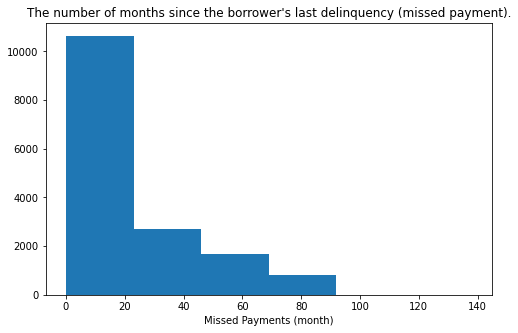

In [84]:
# start with a standard-scaled plot
binsize = k
bins = np.arange(loan['mths_since_last_delinq'].min()-0.01, loan['mths_since_last_delinq'].max()+binsize, binsize)


plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'mths_since_last_delinq', bins = bins)

plt.xlabel('Missed Payments (month)')
plt.title("The number of months since the borrower's last delinquency (missed payment).")
plt.show()

In [85]:
print("{:.2f}% of customers have very a good deliquency records with zero (0) months of missed payment" .format(loan.mths_since_last_delinq.value_counts()[0]/loan.mths_since_last_delinq.value_counts().sum()*100))

47.94% of customers have very a good deliquency records with zero (0) months of missed payment


**Question 15**: What is the distribution of customer's bankcard accounts?

In [86]:
def choose_k(col, a=1, df = loan):
    """
    This function computes k according to the bin sizes 
    reference: https://en.wikipedia.org/wiki/Histogram: Approaches to choose bin sizes  of a data.
    """
    if a == 1 :
        h = 3.49 * df[col].std() * df.shape[0]**(1/3)
        scott = (df[col].max() - df[col].min()) * 0.5
        k = scott

    elif a == 2 :
        k = 2 * df.shape[0]**(1/3)

    elif a == 3:
        k =  df.shape[0]**(1/2)

    return k

In [87]:
loan['num_bc_tl'].min(), loan['num_bc_tl'].max()

(1.0, 45.0)

In [88]:
choose_k('num_bc_tl', 2)

50.25258849895244

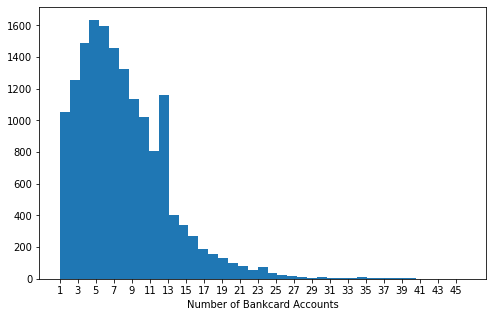

In [89]:
# start with a standard-scaled plot
binsize = choose_k('num_bc_tl', 1) /20
bins = np.arange(loan['num_bc_tl'].min()-0.01, loan['num_bc_tl'].max()+binsize, binsize)


plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'num_bc_tl', bins = bins)

plt.xlabel('Number of Bankcard Accounts')
plt.xticks(np.arange(1, 46,2))
plt.show()

The above is roughly bimodal with many customers having as much as 5-7 bank accounts.

**Question 16**: What is the distribution of customer's number of installment accounts?

In [90]:
loan['num_il_tl'].min(), loan['num_il_tl'].max()

(1.0, 78.0)

In [91]:
choose_k('num_il_tl', 1)

38.5

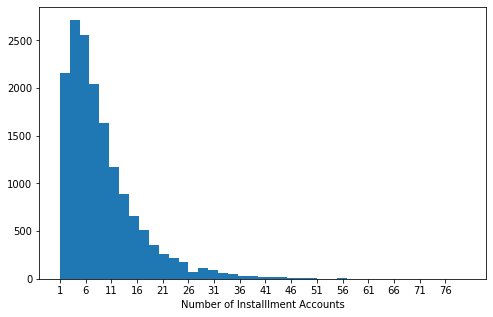

In [92]:
# start with a standard-scaled plot
binsize = choose_k('num_il_tl', 1) /20
bins = np.arange(loan['num_il_tl'].min()-0.01, loan['num_il_tl'].max()+binsize, binsize)


plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'num_il_tl', bins = bins)

plt.xlabel('Number of Installlment Accounts')
plt.xticks(np.arange(1, 80,5))
plt.show()

The above is roughly bimodal with many customers having as much as 6-10 installment accounts.

**Question 17**: What is the distribution of customer's number of open credit lines in the borrower's credit file?

In [93]:
loan['open_acc'].min(), loan['open_acc'].max()

(1, 50)

In [94]:
choose_k('open_acc', 2)

50.25258849895244

In [95]:
def plot_standard_scale(col, xticks = None, df = loan, binsize_div = 1, xlabel = 'xlabel', kk =1):
    # start with a standard-scaled plot
    binsize = choose_k(col, kk) /binsize_div
    bins = np.arange(df[col].min()-0.01, df[col].max()+binsize, binsize)
    plt.figure(figsize=[8, 5])
    plt.hist(data = df, x = col, bins = bins)
    plt.xticks(xticks)

    plt.xlabel(xlabel)
    plt.show()

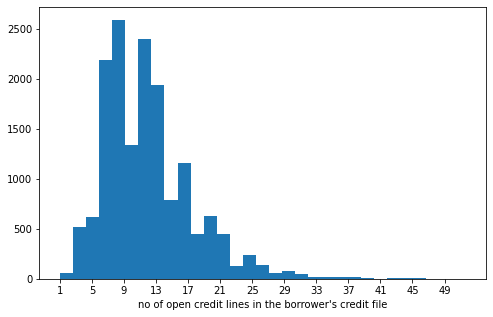

In [96]:
plot_standard_scale('open_acc', xlabel = "no of open credit lines in the borrower's credit file", binsize_div = 15, xticks = np.arange(1, 51,4))

The above is roughly bimodal with many customers having as much as 9 and 12 open credit lines in their credit file.

**Question 18**: What is the distribution of customer's percentage of all bankcard accounts > 75% of limit.?

In [97]:
loan['percent_bc_gt_75'].min(), loan['percent_bc_gt_75'].max()

(0.0, 100.0)

In [98]:
choose_k('percent_bc_gt_75', 1)

50.0

In [99]:
loan.percent_bc_gt_75.value_counts()

0.00      3639
100.00    2892
50.00     1751
33.30     1072
66.70     1036
          ... 
0.38         1
5.90         1
70.60        1
31.60        1
0.50         1
Name: percent_bc_gt_75, Length: 110, dtype: int64

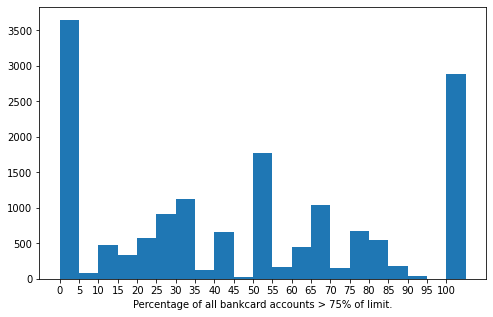

In [100]:
plot_standard_scale('percent_bc_gt_75', xlabel = "Percentage of all bankcard accounts > 75% of limit.", binsize_div = 10, kk=1,
                    xticks = np.arange(0,101,5))

The distribution of the above plot shows us that most customers have their percentage of all bankcard accounts > 75% of limit to be 0%, 100% and 50% respectively.

**Question 19**: What is the distribution of customer's number of public record bankruptcies?

In [101]:
loan['pub_rec_bankruptcies'].min(), loan['pub_rec_bankruptcies'].max()

(0, 6)

In [102]:
choose_k('pub_rec_bankruptcies', 1)

3.0

In [103]:
loan.pub_rec_bankruptcies.value_counts()

0    13796
1     1939
2       99
3       19
4        7
5        2
6        1
Name: pub_rec_bankruptcies, dtype: int64

In [104]:
def plot_percentage_bar2(col, df = loan, xlabel = None, title = None, length = 7, height = 5):
    percentage = [round(i/sum(df[col].value_counts())*100, 2) for i in df[col].value_counts().values]

    plt.figure(figsize=(length,height))

    graph = plt.bar(df[col].value_counts().index, df[col].value_counts().values)

    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.title(None);

    plt.xticks(df[col].value_counts().index)
 
    i = 0
    for p in graph:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        plt.text(x+width/2,
             y+height*1.01,
             str(percentage[i])+'%',
             ha='center'
             )
        i+=1
    plt.show()

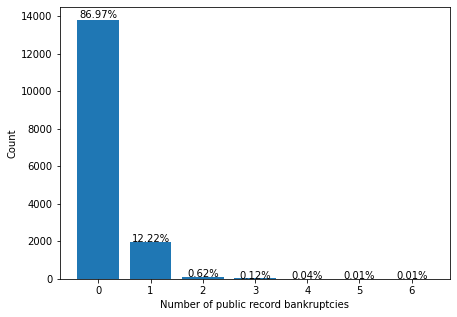

In [105]:
plot_percentage_bar2('pub_rec_bankruptcies', xlabel = 'Number of public record bankruptcies')

An overwhelming number of customers have 86.97% of zero public record of bankruptcy. However, 0.01% i.e just a customer have  6 public record of bankruptcies.

**Question 20**: What is the distribution of customer's total number of credit lines currently in the borrower's credit file?

In [106]:
loan['total_acc'].min(), loan['total_acc'].max()

(3, 110)

In [107]:
choose_k('total_acc', 1)

53.5

In [108]:
loan.total_acc.value_counts()

18     593
20     591
23     590
22     578
19     571
      ... 
94       1
101      1
107      1
110      1
86       1
Name: total_acc, Length: 92, dtype: int64

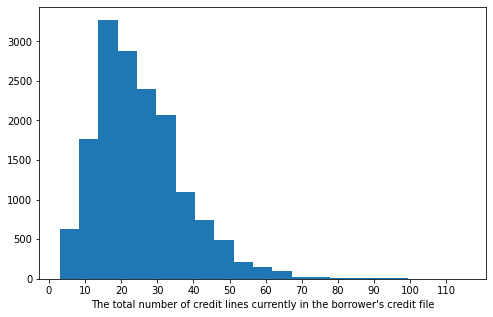

In [109]:
plot_standard_scale('total_acc', xlabel = "The total number of credit lines currently in the borrower's credit file",
                    binsize_div = 10, kk=1,  xticks = np.arange(0,120,10))

An high number of customers have approximately 15-25 of their credit lines in the borrower's credit file.

**Question 21**: What is the distribution of customer's total credit balance excluding mortgage?

In [110]:
loan['total_bal_ex_mort'].min(), loan['total_bal_ex_mort'].max()

(0.0, 1501187.0)

In [111]:
choose_k('total_bal_ex_mort', 1)

750593.5

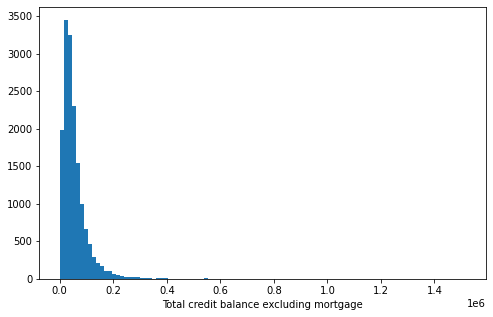

In [112]:
plot_standard_scale('total_bal_ex_mort', xlabel = "Total credit balance excluding mortgage",
                    binsize_div = 50, kk=1)

This shows a long-tail distribution. It makes sense to use a log-scale histogram.

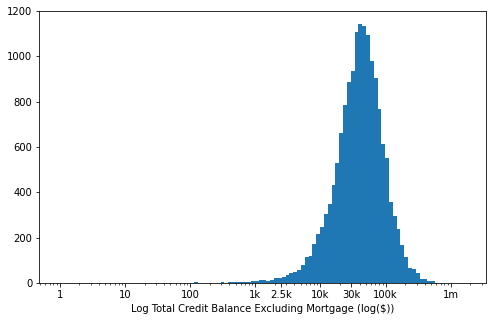

In [113]:
# log-scaled plot
k = choose_k('total_bal_ex_mort', 1)
log_binsize = np.log10(k)*10**(-2)
bins = 10 ** np.arange(0, np.log10(loan['total_bal_ex_mort'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'total_bal_ex_mort', bins = bins)

plt.xscale('log')
plt.xticks([  1e0, 1e1, 1e2, 1e3, 2.5e3, 1e4, 3e4, 1e5, 1e6], 
           [ '1', '10', '100', '1k', '2.5k', '10k', '30k', '100k', '1m'])

plt.xlabel('Log Total Credit Balance Excluding Mortgage (log($))')
plt.show()

As seen with previous variables relating to salary, we see outliers here in the range \$1-\$1k.  A good part of the variable `total_bal_ex_mort` is between \$2.5k to \$1m. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The variables relating to salary, account balance were skewed. We had to apply log transformation to this group as explained earlier in order to observe their peaks and outliers. All these have been explained earlier.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Most of the variables had outliers, also, there were variables in many cases that applies to a large percentage of the customers. For instance:

- 78.9% of customers paid back their loans
- 36.72% of customers had 10+ year of employment length
- 14.89% of customers had 'manager' in their employment title
- 59.13% of customers had their purpose of loan request as 'debt consolidation'
- 70.3% of customers had loans for 36-months.
- 41.18% of customers do not possess any mortgage account
- 47.94% of customers have 0 months of missed payments
- 86.97% of customers have 0 public record of bankruptcy.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

**Question 22**: To start off with, I want to look at the pairwise correlations present between features in the data.

First of all, we create a column for loan status where 1 implies Fully Paid and 0 implies Charged Off.

In [114]:
loan['loan_status_coded'] = loan['loan_status'].apply(lambda i : 1 if i == 'Fully Paid' else 0)
loan['loan_status_coded'] = loan['loan_status_coded'].astype(int)

In [115]:
loan.sample(2)

,addr_state,annual_inc,emp_length,emp_title,home_ownership,installment,loan_amnt,purpose,term,int_rate,avg_cur_bal,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_last_delinq,num_bc_tl,num_il_tl,num_op_rev_tl,num_tl_90g_dpd_24m,num_tl_op_past_12m,open_acc,percent_bc_gt_75,pub_rec_bankruptcies,total_acc,total_bal_ex_mort,loan_status,loan_status_coded
16141,TX,85000.0,3 years,advisor,MORTGAGE,664.20,20000,credit_card,36 months,0.1199,2863.0,126.0,136.0,10.0,10.0,0,42.0,11.0,7.0,13.0,0.0,4.0,16,30.0,0,21,45804.0,Charged Off,0
10,PA,81000.0,8 years,school staff,MORTGAGE,503.16,16000,credit_card,36 months,0.0824,12658.0,207.0,202.0,31.0,5.0,3,50.0,12.0,36.0,11.0,0.0,2.0,18,71.4,0,66,131604.0,Fully Paid,1


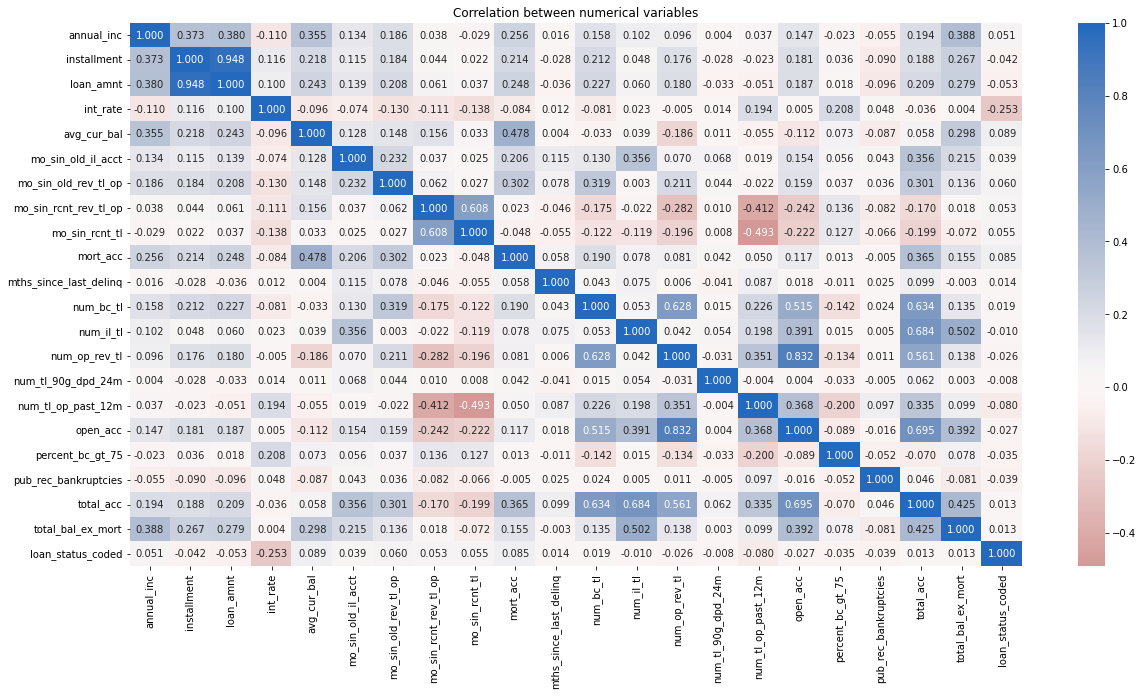

In [116]:
# correlation plot
plt.figure(figsize = [20, 10])
sb.heatmap(loan.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation between numerical variables')
plt.show()

From the correlation heat map above we see strong positive correlation between:
- loan amount and installment [0.95]
- open_acc and num_op__rev_tl [0.832]
- total_acc and num_bc_tl [0.634]
- total_acc and num_it_tl [0.684]
- total_acc and open_acc [0.695]
- total_bal_ex_mort and num_it_tl [0.502]

On the other hand, we have some notable negative correlations between:
- num_tl_op_past_12m and mo_sin_rcnt_tl [-0.493]
- num_tl_op_past_12m and mo_sin_rcnt_rev_tl_op [-0.412]

In [118]:
# plot matrix: sample 500 loan application so that plots are clearer and
# they render faster
# samples = np.random.choice(loan.shape[0], 500, replace = False)
loan_samp = loan.iloc[:, :-1].sample(500)

g = sb.PairGrid(data = loan_samp)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)


The scatter matrix plot we have above confirms the correlation heat map plot we had earlier. For instance, we could visualize the almost perfect relationship between installment and loan amount, open_acc and num_op__rev_tl amongst other. Furthermore, since most of the other variables have very low correlation, it is difficult to establish patterns through the scatterplots. Consequently, we shall investigate the relationship between loan status and other features in the dataset which we think will help support our investigation as discussed earlier.

**Question 23**: Relationship between loan amount and loan status.

In [119]:
loan.groupby('loan_status')['loan_amnt'].sum()

loan_status
Charged Off     56819600
Fully Paid     197232425
Name: loan_amnt, dtype: int64

For the loan amount requested, aproximately \$200m of applied loan were Fully Paid as against \$57m that was Charged off.

In [120]:
loan.groupby('loan_status')['loan_amnt'].mean()

loan_status
Charged Off    16976.277263
Fully Paid     15758.423218
Name: loan_amnt, dtype: float64

On average, \$15.7k of loan amount were Fully Paid and \$16.9k of loan amount were charged off.  

Text(0.5, 1.05, 'Distribution of Loan Amount and Loan Status')

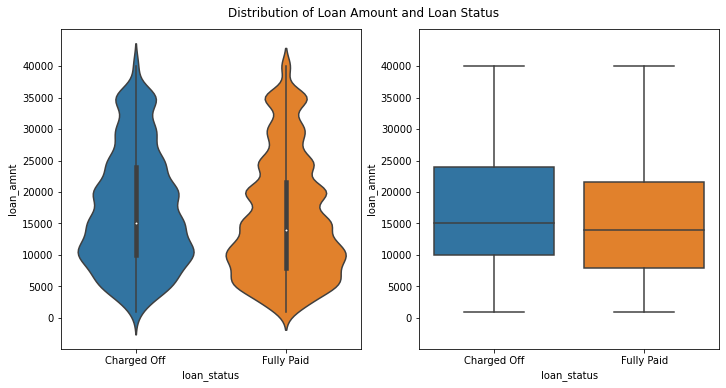

In [158]:
# TWO PLOTS IN ONE FIGURE

plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
plt.tight_layout(pad=10)

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data = loan, y="loan_amnt", x="loan_status");
plt.xticks(rotation=0);
plt.yticks(np.arange(0,40001,5000))

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan, y="loan_amnt", x="loan_status");
plt.xticks(rotation=0);
plt.yticks(np.arange(0,40001,5000))
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot
plt.suptitle('Distribution of Loan Amount and Loan Status')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=10.0)

# plt.title('Distribution of Loan Amount and Loan Status')

plt.suptitle('Distribution of Loan Amount and Loan Status', y=1.05) 

From the above plot, we see that there's no much difference in distribution between loan amount requested between the customer segment of interest (i.e Charged Off and Fully Paid). Nevertheless, we see from the violin plot that more people requested loans between \$20k to a \$5k.

**Question 24**: Relationship between loan status and annual income.

In [160]:
loan.groupby('loan_status')['annual_inc'].sum()

loan_status
Charged Off    257109609.59
Fully Paid    1065725784.56
Name: annual_inc, dtype: float64

For the loan amount requested, customers who Fully Paid their loans had a total income of \$1.06bn as against \$257m annual income for those that were Charged off.

In [161]:
loan.groupby('loan_status')['annual_inc'].mean()

loan_status
Charged Off   76817.93
Fully Paid    85149.07
Name: annual_inc, dtype: float64

On average, Fully Paid customers have an income of \$85.1k against \$76.8k for the Charged Offs.  

Text(0.5, 1.05, 'Distribution of Log Annual Income and Loan Status')

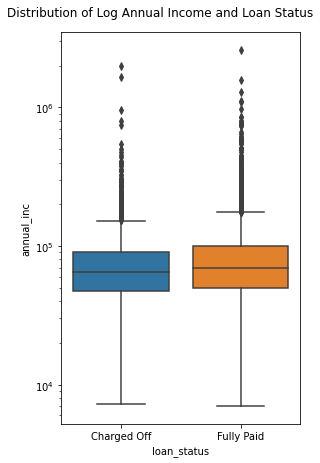

In [187]:
plt.figure(figsize = [4, 6])
base_color = sb.color_palette()[0]

sb.boxplot(data = loan, y="annual_inc", x="loan_status");
plt.xticks(rotation=0);
plt.yscale('log')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=10.0)

plt.suptitle('Distribution of Log Annual Income and Loan Status', y=1.05) ;

From the above, we witness that so many individual earn so much in the data. Even at that, these outliers are equally occuring in the two segment of interest. Consequently, we observe equal an almost identical distribution.

**Question 25**: Relationship between loan status and state address. Away from the univariate plot for the state address, this time we look at the outcome for the top 30 states.

In [254]:
sort = loan.groupby(['addr_state'])['loan_status'].count().sort_values(ascending = False).index[:30] # pick top 30 states
# sort

In [261]:
loan_top_30_states = loan[loan['addr_state'].isin(sort)]
loan_top_30_states['addr_state'] = loan_top_30_states['addr_state'].astype('object')
loan_top_30_states['addr_state'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dtype('O')

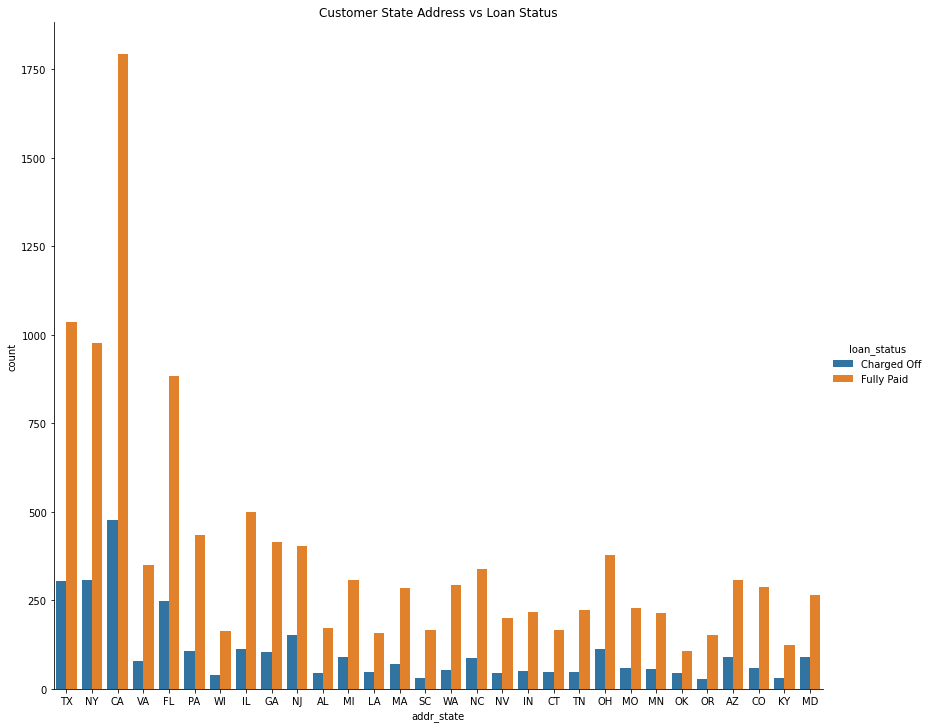

In [271]:
sb.catplot(data = loan_top_30_states, x="addr_state", hue="loan_status", kind = 'count', height=10, aspect=11.7/10);
plt.title('Customer State Address vs Loan Status') ;

From the above plot, we witness that states with high amount of loan applications also witnessed a high amount of loan Fully Paid and Charged off loans as well. Notable states include : CA, TX, NY, FL, VA, PA and IL. Furthermore, there are no states where the number of customers who were Charged Off were more than those that were Fully Paid.

**Question 25**: Relationship between loan status and employment length.

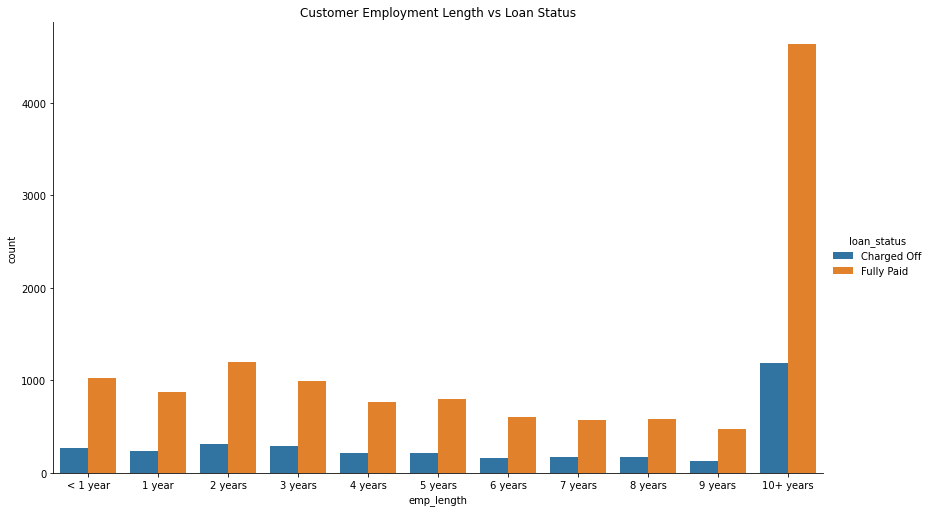

In [281]:
ax = sb.catplot(data = loan, x="emp_length", hue="loan_status", kind = 'count', height=7, aspect=11.7/7);
plt.title('Customer Employment Length vs Loan Status') ;

From the above plot, most customers with 10+ years of employment did well in paying their loans. Although they equally have more individuals who were charged off.

**Question 26**: Relationship between loan status and the number of months since the borrower's last delinquency (missed payment).

In [282]:
loan.mths_since_last_delinq.dtype

dtype('float64')

Text(0.5, 1.05, 'Distribution of Loan Amount and Loan Status')

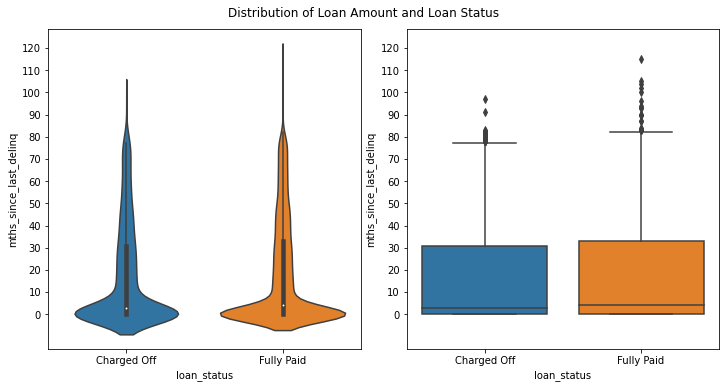

In [286]:
# TWO PLOTS IN ONE FIGURE

plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
plt.tight_layout(pad=10)

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data = loan, y="mths_since_last_delinq", x="loan_status");
plt.xticks(rotation=0);
plt.yticks(np.arange(0,121,10))

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data = loan, y="mths_since_last_delinq", x="loan_status");
plt.xticks(rotation=0);
plt.yticks(np.arange(0,121,10))
plt.ylim(ax1.get_ylim()); # set y-axis limits to be same as left plot
plt.suptitle('Distribution of Loan Amount and Loan Status')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=10.0)

# plt.title('Distribution of Loan Amount and Loan Status')

plt.suptitle('Distribution of Loan Amount and Loan Status', y=1.05) 

We again witness identical distribution, but this time those who Fully Paid had more lower missed payment and also extremes too. We may assume that those who had lower missed payments aimed to maintain good credit worthiness and those who are on the extreme (of Fully Paid) did so to 'repair' their credit worthiness.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

**Question 27**: Relationship between loan status and the number of months since the borrower's last delinquency (missed payment).

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

